# Побудова нейромережі за допомогою Keras

In [605]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras import utils

In [606]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(f"x_train: {x_train.shape}, y_train: {y_train.shape}")

x_train: (60000, 28, 28), y_train: (60000,)


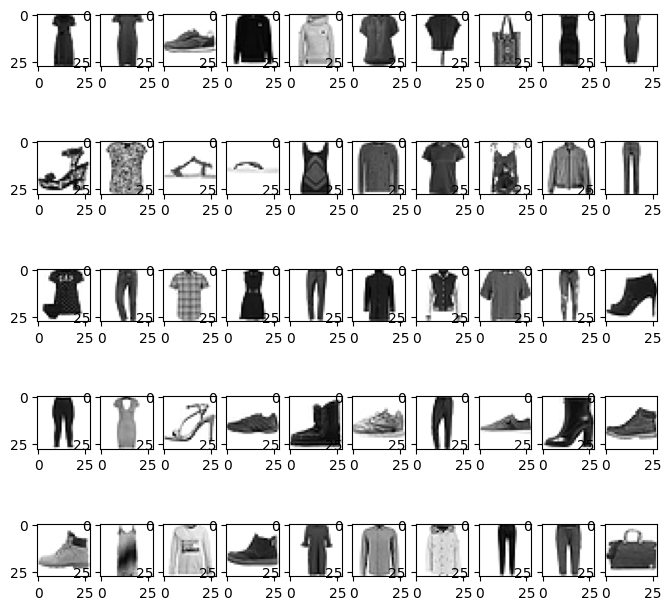

In [550]:
plt.figure(figsize=(8, 8))
for i in range(50, 100):
  plt.subplot(5, 10, i - 50 + 1)
  plt.subplots_adjust()
  plt.imshow(x_train[i], cmap=plt.cm.binary)

## Змінюємо розмірість матриці

In [607]:
num_classes = 10
classes = {0: "футболка", 1: "штани", 2: "світер", 3: "плаття", 4: "пальто", 5: "туфлі", 6: "сорочка", 7: "кросівки", 8: "сумка", 9: "чоботи"}


# def data_reshape(data, shape=784):
#     results = np.zeros((len(data), shape))
#     for i, j in enumerate(data):
#         results[i, j] = 1.0
#     return results


# x_train = data_reshape(x_train)
x_train = x_train.reshape(60000, 784)
x_train = x_train / 255

# x_test = data_reshape(x_test)
x_test = x_test.reshape(10000, 784)
x_test = x_test / 255

print(f"x_train: {x_train.shape}, x_test: {x_test.shape}")

x_train: (60000, 784), x_test: (10000, 784)


In [608]:
# y_train = data_reshape(y_train, num_classes)
y_train = utils.to_categorical(y_train, num_classes)

# y_test = data_reshape(y_test, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

y_train: (60000, 10), y_test: (10000, 10)


## Визначаємо архітектуру NN: побудова 3 шарів

In [609]:
model = Sequential([
    Dense(800, activation="relu", input_shape=(784,)),
    Dense(400, activation="relu"),
    Dense(10, activation="softmax")
])

In [610]:
from keras import optimizers
from keras import losses
from keras import metrics


model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


# model.compile(
#     optimizer=optimizers.SGD(learning_rate=0.001),
#     loss=losses.CategoricalCrossentropy(),
#     metrics=[metrics.Accuracy()]
# )

In [611]:
model.summary()

Model: "sequential_112"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_361 (Dense)           (None, 800)               628000    
                                                                 
 dense_362 (Dense)           (None, 400)               320400    
                                                                 
 dense_363 (Dense)           (None, 10)                4010      
                                                                 
Total params: 952410 (3.63 MB)
Trainable params: 952410 (3.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Навчаємо модель

In [612]:
history = model.fit(
    x_train,
    y_train,
    batch_size=450,
    epochs=50,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
107/107 [==============================] - 6s 53ms/step - loss: 0.7461 - accuracy: 0.7358 - val_loss: 0.4584 - val_accuracy: 0.8378
Epoch 2/50
107/107 [==============================] - 5s 46ms/step - loss: 0.4742 - accuracy: 0.8259 - val_loss: 0.4362 - val_accuracy: 0.8420
Epoch 3/50
107/107 [==============================] - 6s 56ms/step - loss: 0.4068 - accuracy: 0.8496 - val_loss: 0.3841 - val_accuracy: 0.8604
Epoch 4/50
107/107 [==============================] - 5s 44ms/step - loss: 0.3716 - accuracy: 0.8615 - val_loss: 0.3814 - val_accuracy: 0.8585
Epoch 5/50
107/107 [==============================] - 6s 56ms/step - loss: 0.3434 - accuracy: 0.8696 - val_loss: 0.3835 - val_accuracy: 0.8605
Epoch 6/50
107/107 [==============================] - 5s 45ms/step - loss: 0.3211 - accuracy: 0.8797 - val_loss: 0.3673 - val_accuracy: 0.8617
Epoch 7/50
107/107 [==============================] - 5s 46ms/step - loss: 0.3024 - accuracy: 0.8860 - val_loss: 0.4321 - val_accuracy: 0.8364

Text(0.5, 1.0, 'Графік тестових і навчальних точностей')

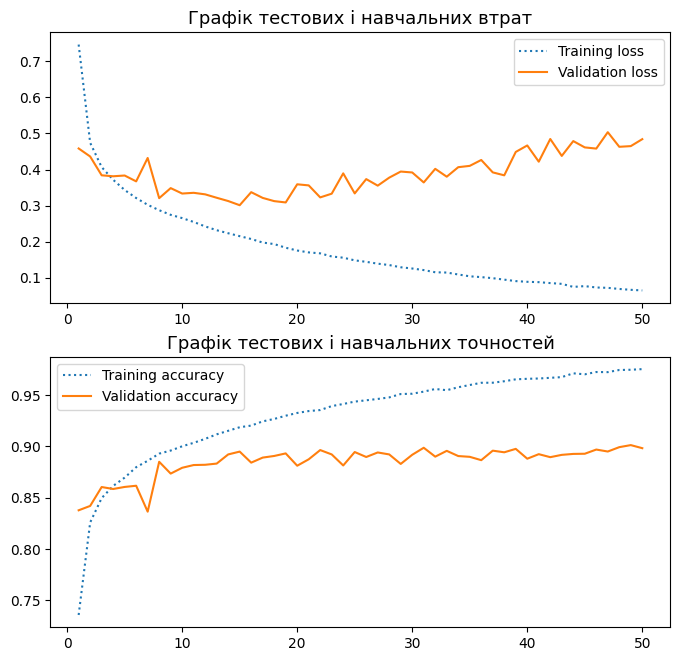

In [613]:
history_dict = history.history

# loss - список, в якому зберігається історія змін помилки на навчальних даних залежно від епохи
# val_loss - список, де зберігається історія змін помилки на тестових даних залежно від епохи
# accuracy - список, в якому зберігається історія змін точності на навчальних даних залежно від епохи
# val_accuracy - список, де зберігається історія змін точності на тестових даних залежно від епохи

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
accuracy_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]

epochs = range(1, len(accuracy_values) + 1)

fig, axs = plt.subplots(2, 1, figsize=(8, 5))
plt.subplots_adjust(top=1.3)
axs[0].plot(epochs, loss_values, linestyle=":", label="Training loss")
axs[0].plot(epochs, val_loss_values, label="Validation loss")
axs[0].legend()
axs[0].set_title("Графік тестових і навчальних втрат", fontsize=13)

axs[1].plot(epochs, accuracy_values, linestyle=":", label="Training accuracy")
axs[1].plot(epochs, val_acc_values, label="Validation accuracy")
axs[1].legend()
axs[1].set_title("Графік тестових і навчальних точностей", fontsize=13)

In [614]:
result_test = model.evaluate(x_test, y_test)
result_train = model.evaluate(x_train, y_train)
print("Відсоток точності тестових даних: ", round(result_test[1] * 100, 2))
print("Відсоток точності навчальних даних: ", round(result_train[1] * 100, 2))

1875/1875 [==============================] - 8s 4ms/step - loss: 0.1524 - accuracy: 0.9595
Відсоток точності тестових даних:  89.3
Відсоток точності навчальних даних:  95.95


In [615]:
model = Sequential()
model.add(Dense(800, input_dim=784, activation="relu"))
model.add(Dense(400, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(x_train, y_train, epochs=10, batch_size=450)

result_test = model.evaluate(x_test, y_test)
result_train = model.evaluate(x_train, y_train)
print("Відсоток точності тестових даних: ", round(result_test[1] * 100, 2))
print("Відсоток точності навчальних даних: ", round(result_train[1] * 100, 2))

Epoch 1/10
134/134 [==============================] - 6s 40ms/step - loss: 0.7068 - accuracy: 0.7458
Epoch 2/10
134/134 [==============================] - 7s 50ms/step - loss: 0.4467 - accuracy: 0.8350
Epoch 3/10
134/134 [==============================] - 5s 40ms/step - loss: 0.3871 - accuracy: 0.8547
Epoch 4/10
134/134 [==============================] - 7s 50ms/step - loss: 0.3524 - accuracy: 0.8685
Epoch 5/10
134/134 [==============================] - 5s 41ms/step - loss: 0.3245 - accuracy: 0.8789
Epoch 6/10
134/134 [==============================] - 7s 49ms/step - loss: 0.3070 - accuracy: 0.8849
Epoch 7/10
134/134 [==============================] - 6s 41ms/step - loss: 0.2883 - accuracy: 0.8911
Epoch 8/10
134/134 [==============================] - 6s 44ms/step - loss: 0.2755 - accuracy: 0.8952
Epoch 9/10
134/134 [==============================] - 6s 46ms/step - loss: 0.2593 - accuracy: 0.9006
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3508 - accur

In [616]:
model.save("my_model")

## Розпізнаємо клас

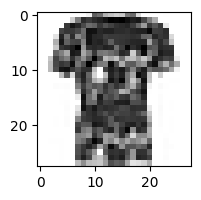

In [617]:
n_img = 400
plt.figure(figsize=(2, 2))
plt.imshow(x_test[n_img].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [618]:
x = x_test[n_img]
x = np.expand_dims(x, axis=0)
prediction = model.predict(x)
prediction = np.argmax(prediction[0])
print(f"Номер класу: {prediction}\nНазва: {classes[prediction]}")

1/1 [==============================] - 0s 71ms/step
Номер класу: 0
Назва: футболка
